In [1]:
#importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing the data
fifa19 = pd.read_csv('Fifa19.csv')

In [3]:
#first five rows
fifa19.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Text(0, 0.5, 'Count')

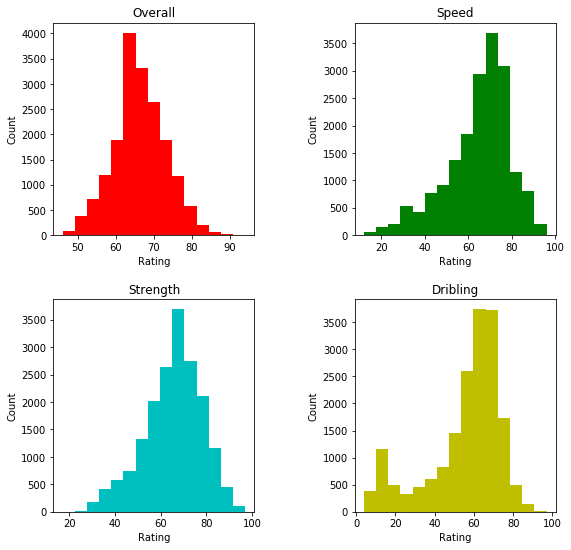

In [23]:
#Looking at the distribution of various attributes in the game
plt.figure(figsize=(9,9))
plt.subplots_adjust(hspace=.3)
plt.subplots_adjust(wspace=.5)
plt.subplot(221)
plt.hist(fifa19['Overall'], bins = 15, color = 'r')
plt.title('Overall')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.subplot(222)
plt.hist(fifa19['SprintSpeed'], bins = 15, color = 'g')
plt.title('Speed')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.subplot(223)
plt.hist(fifa19['Strength'], bins = 15, color = 'c')
plt.title('Strength')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.subplot(224)
plt.hist(fifa19['Dribbling'], bins = 15, color = 'y')
plt.title('Dribling')
plt.xlabel('Rating')
plt.ylabel('Count')

In [6]:
#Getting the wages and release clauses as numerical columns
#Major thanks to Ckalib Nelson for this code
fifa19.rename(columns={'Wage': 'Wage (thousands)', 'Release Clause': 'Release Clause (millions)'}, inplace=True)
fifa19["Wage (thousands)"] = fifa19["Wage (thousands)"].str.replace('€','')
fifa19["Wage (thousands)"] = fifa19["Wage (thousands)"].str.replace('K','')
fifa19["Wage (thousands)"] = fifa19["Wage (thousands)"].astype('float64')
fifa19["Release Clause (millions)"] = fifa19["Release Clause (millions)"].str.replace('€','')
fifa19["Release Clause (millions)"] = fifa19["Release Clause (millions)"].str.replace('M','')
fifa19["Release Clause (millions)"] = fifa19["Release Clause (millions)"].str.replace('K','')
fifa19["Release Clause (millions)"] = fifa19["Release Clause (millions)"].astype('float64')

In [7]:
#Writing a function to get a categories for wages
def wage_cat(Wage):
    if Wage >= 200:
        return (">200")
    elif Wage < 200 and Wage >= 100:
        return ("100-200")
    elif Wage < 100 and Wage >= 50:
        return ("50-100")
    elif Wage < 50 and Wage >= 10:
        return ("10-50")
    else:
        return ("<10")
fifa19['Wage Category'] = fifa19['Wage (thousands)'].apply(wage_cat)
print(fifa19.shape)

(18207, 90)


In [8]:
#Getting separate data frames for attackers and defenders
attackers = fifa19[(fifa19['Position'] == "ST") | (fifa19['Position'] == "LF") | (fifa19['Position'] == "LW") | 
       (fifa19['Position'] == "RF") | (fifa19['Position'] == "RW") | (fifa19['Position'] == "LS") | 
                   (fifa19['Position'] == "RS") | (fifa19['Position'] == "CF")]
defenders = fifa19[(fifa19['Position'] == "LWB") | (fifa19['Position'] == "LB") | (fifa19['Position'] == "RWB") | 
                  (fifa19['Position'] == "CB") | (fifa19['Position'] == "RB") | (fifa19['Position'] == "RCB") | 
                  (fifa19['Position'] == "LCB")]


In [9]:
#Do higher wages indicate better attributes for attackers?
Wages = attackers.groupby('Wage Category')
speed = Wages[['SprintSpeed']].mean()
speed.reset_index(inplace=True)
dribbling = Wages[['Dribbling']].mean()
dribbling.reset_index(inplace=True)
finishing = Wages[['Finishing']].mean()
finishing.reset_index(inplace=True)
over = Wages[['Overall']].mean()
over.reset_index(inplace=True)

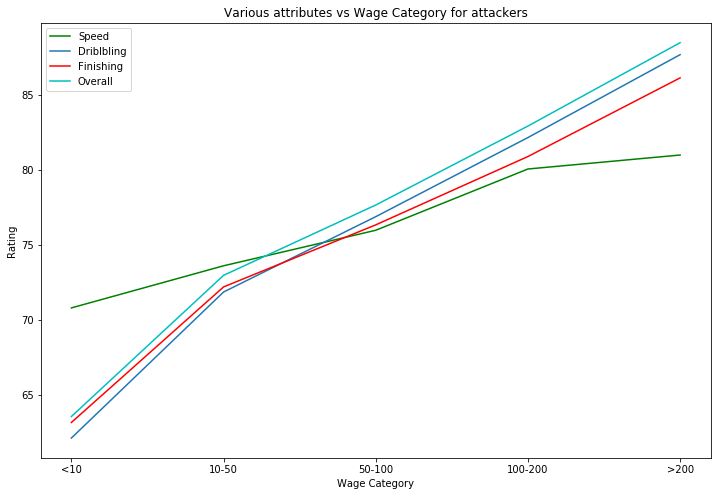

In [10]:
#reference for plotting categorical data: https://matplotlib.org/gallery/lines_bars_and_markers/categorical_variables.html
plt.figure(figsize=(12, 8))
data1 = {'<10': 70.793574, '10-50': 73.604798, '50-100': 75.976744, '100-200': 80.066667, '>200': 81}
names1 = list(data1.keys())
values1 = list(data1.values())
data2 = {'<10': 62.105221, '10-50': 71.854798, '50-100': 76.883721, '100-200': 82.166667, '>200': 87.700000}
names2 = list(data2.keys())
values2 = list(data2.values())
data3 = {'<10': 63.144177, '10-50': 72.194444, '50-100': 76.337209, '100-200': 80.900000, '>200': 86.150000}
names3 = list(data3.keys())
values3 = list(data3.values())
data4 = {'<10': 63.541365, '10-50': 72.967172, '50-100': 77.662791, '100-200': 82.933333, '>200': 88.500000}
names4 = list(data4.keys())
values4 = list(data4.values())
plt.plot(names1, values1, color='g', label = 'Speed')
plt.plot(names2, values2, label = 'Driblbling')
plt.plot(names3, values3, color='r', label = 'Finishing')
plt.plot(names4, values4, color='c', label = 'Overall')
plt.xlabel('Wage Category')
plt.ylabel('Rating')
plt.title('Various attributes vs Wage Category for attackers')
plt.legend()

In [11]:
Wages2 = defenders.groupby('Wage Category')
speed2 = Wages2[['SprintSpeed']].mean()
speed2.reset_index(inplace=True)
interceptions = Wages2[['Interceptions']].mean()
interceptions.reset_index(inplace=True)
stand = Wages2[['StandingTackle']].mean()
stand.reset_index(inplace=True)
over2 = Wages2[['Overall']].mean()
over2.reset_index(inplace=True)

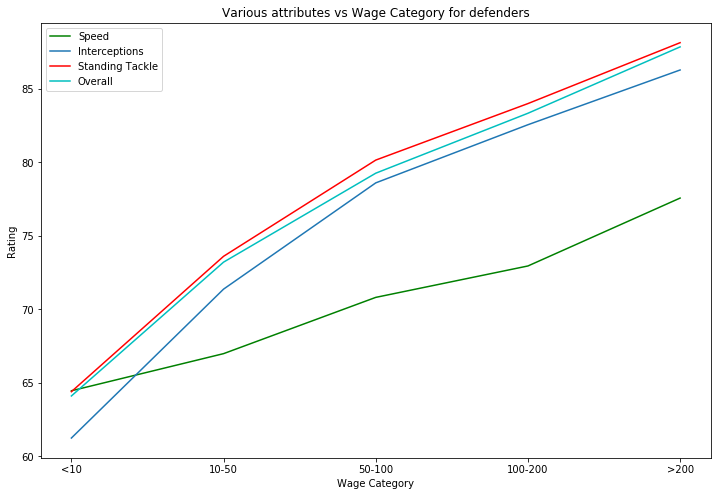

In [12]:
plt.figure(figsize=(12, 8))
data1 = {'<10': 64.459722, '10-50': 66.986183, '50-100': 70.813953, '100-200': 72.951220, '>200': 77.571429}
names1 = list(data1.keys())
values1 = list(data1.values())
data2 = {'<10': 61.244538, '10-50': 71.375648, '50-100': 78.604651, '100-200': 82.560976, '>200': 86.285714}
names2 = list(data2.keys())
values2 = list(data2.values())
data3 = {'<10': 64.397263, '10-50': 73.608808, '50-100': 80.155039, '100-200': 84.000000, '>200': 88.142857}
names3 = list(data3.keys())
values3 = list(data3.values())
data4 = {'<10': 64.106378, '10-50': 73.212435, '50-100': 79.263566, '100-200': 83.341463, '>200': 87.857143}
names4 = list(data4.keys())
values4 = list(data4.values())
plt.plot(names1, values1, color='g', label = 'Speed')
plt.plot(names2, values2, label = 'Interceptions')
plt.plot(names3, values3, color='r', label = 'Standing Tackle')
plt.plot(names4, values4, color='c', label = 'Overall')
plt.xlabel('Wage Category')
plt.ylabel('Rating')
plt.title('Various attributes vs Wage Category for defenders')
plt.legend()

In [29]:
categories = attackers['Skill Moves'].value_counts()
categories

3.0    1749
2.0    1357
4.0     294
5.0      18
Name: Skill Moves, dtype: int64

In [31]:
cmap = plt.get_cmap('viridis')
import numpy as np
colors = cmap(np.linspace(0, 1, len(categories)))
colors

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.190631, 0.407061, 0.556089, 1.      ],
       [0.20803 , 0.718701, 0.472873, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

In [38]:
attackers['color'] = attackers['Skill Moves'].apply(lambda x: colors[categories.index.get_loc(x)])
attackers.head()

C:\Users\cdr42\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause (millions),Wage Category,color
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5,>200,"[0.20803, 0.718701, 0.472873, 1.0]"
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1,>200,"[0.993248, 0.906157, 0.143936, 1.0]"
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1,>200,"[0.993248, 0.906157, 0.143936, 1.0]"
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1,>200,"[0.20803, 0.718701, 0.472873, 1.0]"
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164.0,>200,"[0.267004, 0.004874, 0.329415, 1.0]"


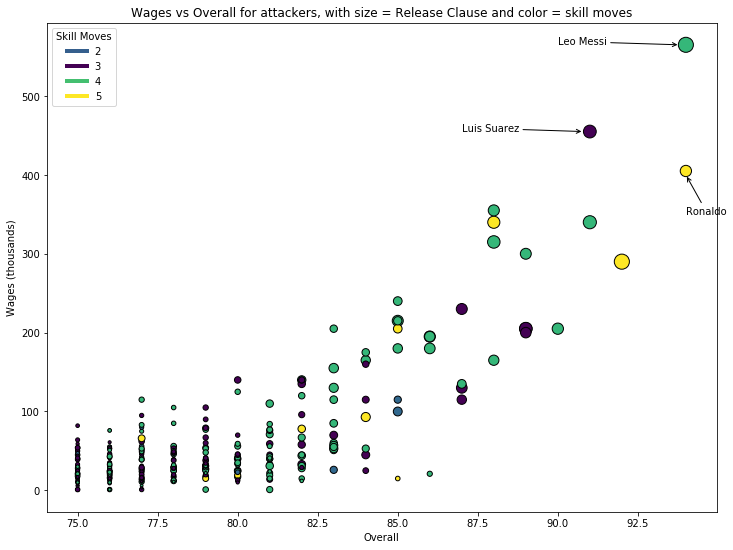

In [81]:
#Looking at the distribution of Overall and Wage for players 75 and above
#reference for the custom legend: https://matplotlib.org/gallery/text_labels_and_annotations/custom_legends.html
from matplotlib.lines import Line2D
attackers2 = attackers[attackers['Overall'] >= 75]
plt.figure(figsize=(12,9))
plt.scatter(attackers2['Overall'], attackers2['Wage (thousands)'], s=attackers2['Release Clause (millions)'], 
            edgecolors='black', c=attackers2['color'])
plt.xlabel('Overall')
plt.ylabel('Wages (thousands)')
plt.title('Wages vs Overall for attackers, with size = Release Clause and color = skill moves')
plt.annotate("Leo Messi", (93.8, 565), (90, 565), arrowprops={'arrowstyle': '->'})
plt.annotate("Luis Suarez", (90.8, 455), (87, 455), arrowprops={'arrowstyle': '->'})
plt.annotate("Ronaldo", (94, 400), (94, 350), arrowprops={'arrowstyle': '->'})
custom_lines = [Line2D([0], [0], color=cmap(0.3), lw=4),
                Line2D([0], [0], color=cmap(0), lw=4),
                Line2D([0], [0], color=cmap(.7), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]
plt.legend(custom_lines, ['2', '3', '4', '5'], title = 'Skill Moves')